In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pdpbox import pdp, get_dataset, info_plots
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
train = pd.read_csv('C:/Users/Hp/Desktop/HIT FOR MORE/titanic2019/train.csv') #Train dataset
test = pd.read_csv('C:/Users/Hp/Desktop/HIT FOR MORE/titanic2019/test.csv') #Test dataset
submission_file = pd.read_csv('C:/Users/Hp/Desktop/HIT FOR MORE/titanic2019/sample submission.csv')

In [3]:
data = pd.concat([train, test], sort = False)
train_len = train.shape[0]

print(data.dtypes.sort_values())
data.head()

PassengerId      int64
Pclass           int64
SibSp            int64
Parch            int64
Survived       float64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()[data.isnull().sum()>0]

Survived     418
Age          263
Fare           1
Cabin       1014
dtype: int64

In [9]:
train.Age=train.Age.fillna(train.Age.mean())
test.Age=test.Age.fillna(train.Age.mean())

train.Fare=train.Fare.fillna(train.Fare.mean())
test.Fare=test.Fare.fillna(train.Fare.mean())

train.Cabin=train.Cabin.fillna("unknow")
test.Cabin=test.Cabin.fillna("unknow")

train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(train.Embarked.mode()[0])

In [10]:
train.drop(['PassengerId','Name'],axis=1,inplace=True)
test.drop(['PassengerId','Name'],axis=1,inplace=True)

In [5]:
data=pd.concat([train, test], sort=False)
data=pd.get_dummies(data)
train=data[:train_len]
test=data[train_len:]

In [10]:
train.Survived=train.Survived.astype('int')

In [11]:
X_train=train.drop("Survived",axis=1)
Y_train=train['Survived']
X_test=test.drop("Survived", axis=1)

In [12]:
RF=RandomForestClassifier(random_state=1)
scores_rf1=cross_val_score(RF,X_train,Y_train,scoring='accuracy',cv=5)
np.mean(scores_rf1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [15]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

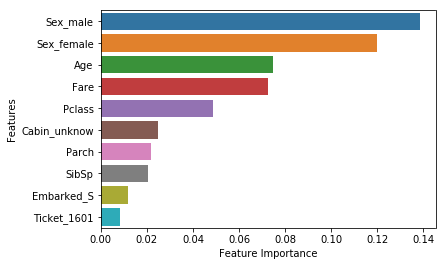

In [16]:
importances=RF.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x= feature_importances[0:10] , y= feature_importances.index[0:10])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

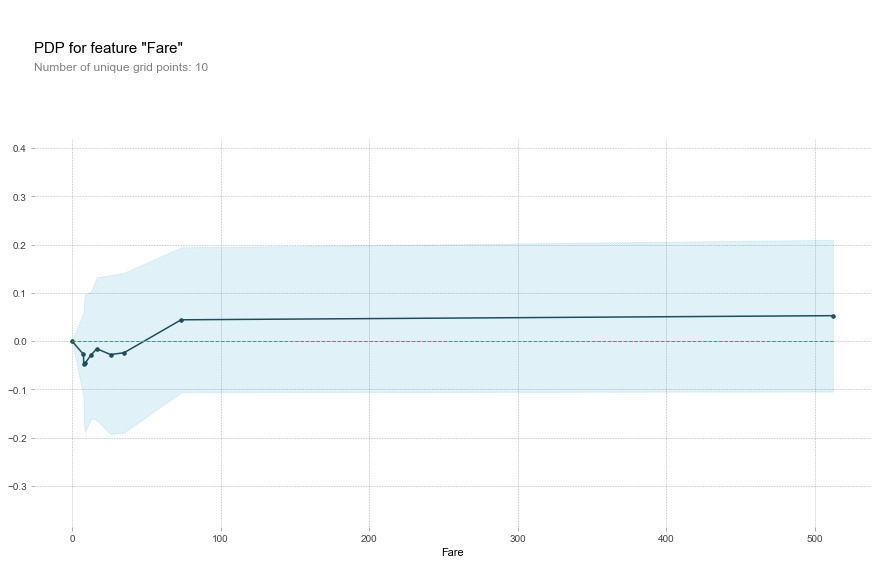

In [17]:
pdp_data = pdp.pdp_isolate(model=RF, dataset=train, model_features=X_train.columns, feature='Fare')
pdp.pdp_plot(pdp_data, 'Fare')
plt.show()

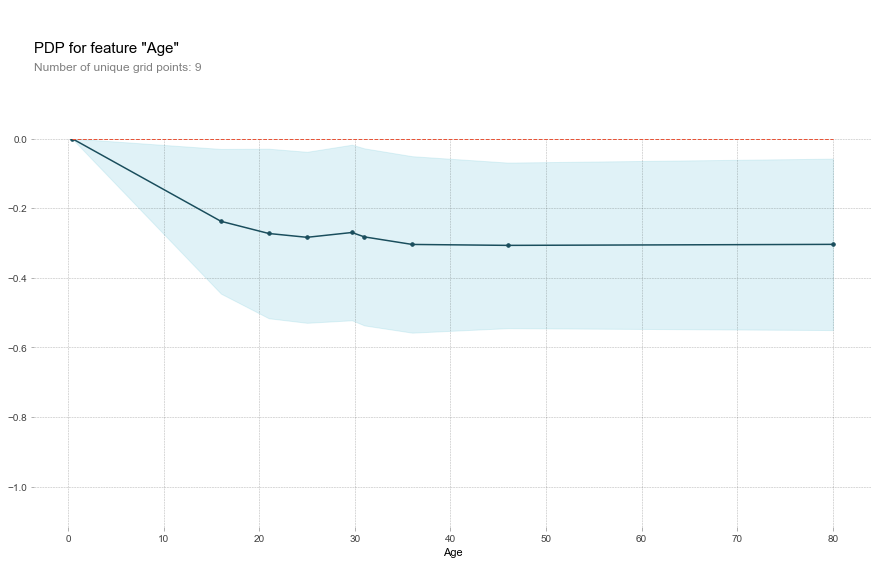

In [18]:
pdp_data = pdp.pdp_isolate(model=RF, dataset=train, model_features=X_train.columns, feature='Age')
pdp.pdp_plot(pdp_data, 'Age')
plt.show()

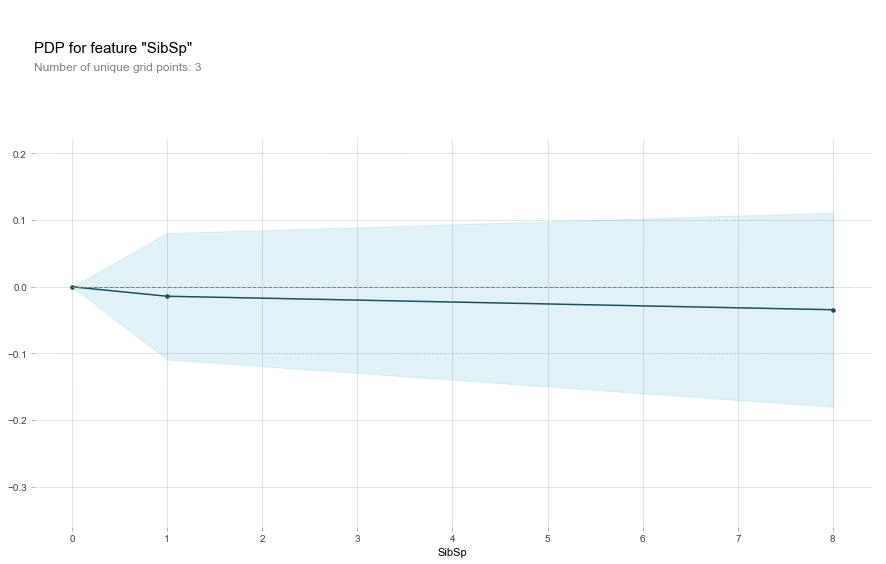

In [19]:
pdp_data = pdp.pdp_isolate(model=RF, dataset=train, model_features=X_train.columns, feature='SibSp')
pdp.pdp_plot(pdp_data, 'SibSp')
plt.show()

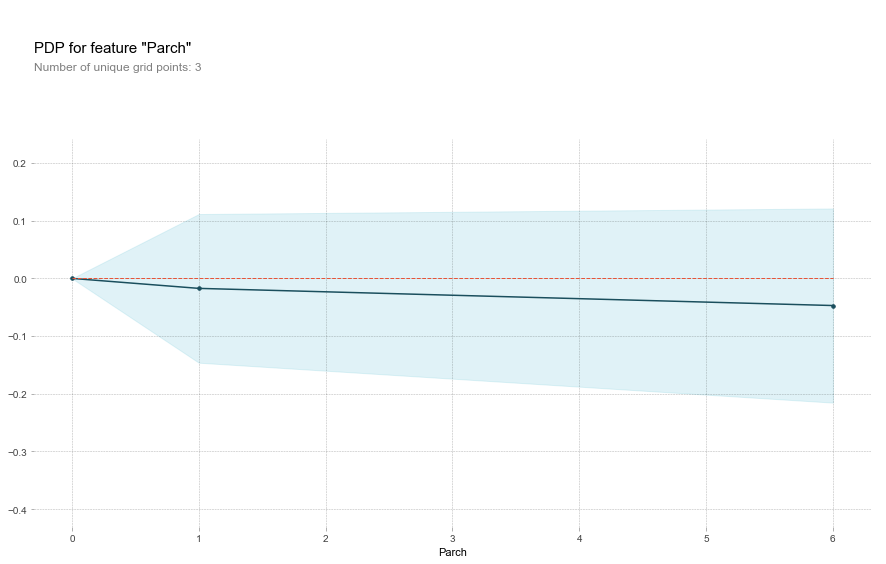

In [20]:
pdp_data = pdp.pdp_isolate(model=RF, dataset=train, model_features=X_train.columns, feature='Parch')
pdp.pdp_plot(pdp_data, 'Parch')
plt.show()

In [21]:
#increasing the number of trees
RF2=RandomForestClassifier(random_state=1, n_estimators= 100000)
RF2.fit(X_train, Y_train)
pred=RF2.predict(X_test)
output=pd.DataFrame({'PassengerId':submission_file['PassengerId'],'Survived':pred})
output.to_csv('Abel_New.csv', index=False)

In [22]:
print (pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [23]:
RF2.score(X_train, Y_train)

acc_RF2 = round(RF2.score(X_train, Y_train) * 100, 2)
print(round(acc_RF2,2,), "%")

99.89 %
